In [43]:
import pandas as pd
import os

directory_path = r'C:\Users\babyk\OneDrive\Desktop\movie_data'

csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

dataframes = {}

for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)
    df = pd.read_csv(file_path)
    dataframes[file_name] = df
    print(f"Loaded {file_name}")


Loaded links.csv
Loaded movies.csv
Loaded ratings.csv
Loaded tags.csv


In [44]:
df_links = dataframes['links.csv']

In [45]:
df_links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [46]:
df_movies = dataframes['movies.csv']

In [47]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
df_movies.shape

(9742, 3)

In [50]:
rating_counts = df_ratings['movieId'].value_counts()

max_ratings_movie_id = rating_counts.idxmax()
max_ratings_count = rating_counts.max()

print(f"Movie with ID {max_ratings_movie_id} has received the maximum number of ratings: {max_ratings_count}")

Movie with ID 356 has received the maximum number of ratings: 329


In [51]:
rating_counts = df_ratings['movieId'].value_counts()

max_ratings_movie_id = rating_counts.idxmax()

movie_details = df_movies[df_movies['movieId'] == max_ratings_movie_id]
movie_name = movie_details['title'].values[0]

print(f"Movie with ID {max_ratings_movie_id} has received the maximum number of ratings.")
print(f"Movie Name: {movie_name}")

Movie with ID 356 has received the maximum number of ratings.
Movie Name: Forrest Gump (1994)


In [52]:
movie_title = "Matrix, The (1999)"
movie_id = df_movies[df_movies['title'] == movie_title]['movieId'].values

if len(movie_id) > 0:
    movie_id = movie_id[0] 

    tags_for_movie = df_tags[df_tags['movieId'] == movie_id]

    print(f"Tags for '{movie_title}':")
    print(tags_for_movie[['tag', 'userId']])
else:
    print(f"Movie '{movie_title}' not found in the dataset.")

Tags for 'Matrix, The (1999)':
                     tag  userId
815         martial arts     424
816               sci-fi     424
1646  alternate universe     474
2794          philosophy     537
2795    post apocalyptic     537


In [53]:
df_ratings = dataframes['ratings.csv']

In [54]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
df_ratings.shape

(100836, 4)

In [56]:
unique_user_count = df_ratings['userId'].nunique()

In [57]:
unique_user_count

610

In [58]:
df_tags = dataframes['tags.csv']

In [59]:
df_tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [60]:
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = df_movies[df_movies['title'] == movie_title]['movieId'].values

if len(movie_id) > 0:
    movie_id = movie_id[0] 

    ratings_for_movie = df_ratings[df_ratings['movieId'] == movie_id]

    average_rating = ratings_for_movie['rating'].mean()

    print(f"The average user rating for '{movie_title}' is: {average_rating:.2f}")
else:
    print(f"Movie '{movie_title}' not found in the dataset.")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

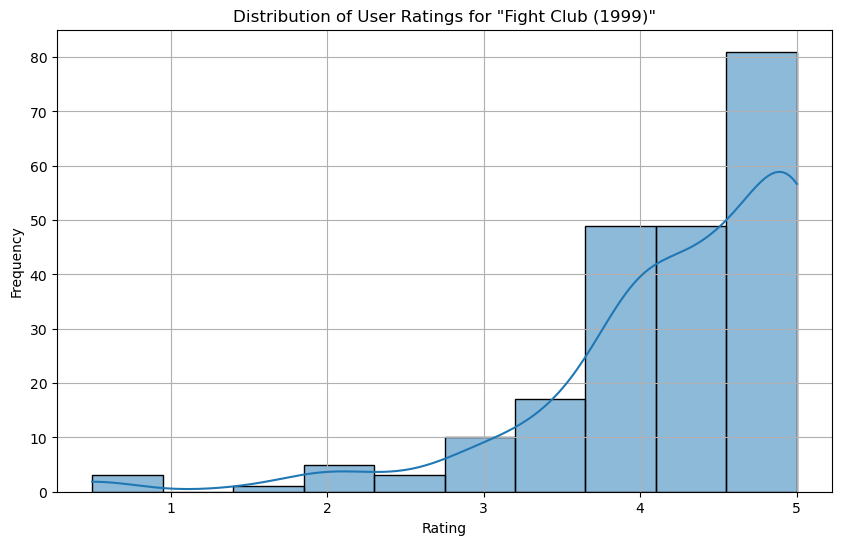

In [63]:
movie_title = "Fight Club (1999)"
movie_id = df_movies[df_movies['title'] == movie_title]['movieId'].values

if len(movie_id) > 0:
    movie_id = movie_id[0]

    ratings_for_movie = df_ratings[df_ratings['movieId'] == movie_id]

    plt.figure(figsize=(10, 6))
    sns.histplot(ratings_for_movie['rating'], bins=10, kde=True)
    plt.title(f'Distribution of User Ratings for "{movie_title}"')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print(f"Movie '{movie_title}' not found in the dataset.")

In [65]:
ratings_file_path = r'C:\Users\babyk\OneDrive\Desktop\movie_data\ratings.csv'

df_ratings = pd.read_csv(ratings_file_path)

aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

print(aggregated_ratings.head())

sorted_by_mean_rating = aggregated_ratings.sort_values(by='mean_rating', ascending=False)
print("Top 5 movies by average rating:")
print(sorted_by_mean_rating.head())

sorted_by_count = aggregated_ratings.sort_values(by='count', ascending=False)
print("Top 5 movies by number of ratings:")
print(sorted_by_count.head())

   movieId  count  mean_rating
0        1    215     3.920930
1        2    110     3.431818
2        3     52     3.259615
3        4      7     2.357143
4        5     49     3.071429
Top 5 movies by average rating:
      movieId  count  mean_rating
7638    88448      1          5.0
8089   100556      1          5.0
9065   143031      1          5.0
9076   143511      1          5.0
9078   143559      1          5.0
Top 5 movies by number of ratings:
      movieId  count  mean_rating
314       356    329     4.164134
277       318    317     4.429022
257       296    307     4.197068
510       593    279     4.161290
1938     2571    278     4.192446


In [66]:
sorted_by_count.head(5)

,movieId,count,mean_rating
314,356,329,4.164134
277,318,317,4.429022
257,296,307,4.197068
510,593,279,4.161290
1938,2571,278,4.192446


In [67]:
movies_file_path = r'C:\Users\babyk\OneDrive\Desktop\movie_data\movies.csv'
ratings_file_path = r'C:\Users\babyk\OneDrive\Desktop\movie_data\ratings.csv'

df_movies = pd.read_csv(movies_file_path)
df_ratings = pd.read_csv(ratings_file_path)

aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  count  mean_rating  
0  Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                   Adventure|Children|Fantasy    110     3.431818  
2                               Comedy|Romance     52     3.259615  
3                         Comedy|Drama|Romance      7     2.357143  
4                                       Comedy     49     3.071429  


In [68]:
merged_df.head()

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [70]:
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count  mean_rating  
0  Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                   Adventure|Children|Fantasy    110     3.431818  
2                               Comedy|Romance     52     3.259615  
5                        Action|Crime|Thriller    102     3.946078  
6                               Comedy|Romance     54     3.185185  


In [71]:
filtered_movies.head()

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [72]:
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),  
    mean_rating=('rating', 'mean') 
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

most_popular_movie = filtered_movies.sort_values(by='mean_rating', ascending=False).iloc[0]

print("Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean_rating']:.2f}")
print(f"Number of Ratings: {most_popular_movie['count']}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


In [73]:
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

top_5_popular_movies = merged_df.sort_values(by='count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'count', 'mean_rating']])

Top 5 popular movies based on number of user ratings:
                                 title  count  mean_rating
314                Forrest Gump (1994)    329     4.164134
277   Shawshank Redemption, The (1994)    317     4.429022
257                Pulp Fiction (1994)    307     4.197068
510   Silence of the Lambs, The (1991)    279     4.161290
1938                Matrix, The (1999)    278     4.192446


In [74]:
sci_fi_movies = df_movies[df_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(sci_fi_movies, aggregated_ratings, on='movieId', how='inner')

third_most_popular_sci_fi = merged_df.sort_values(by='count', ascending=False).iloc[2]

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['count']}")
print(f"Average Rating: {third_most_popular_sci_fi['mean_rating']:.2f}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238
Average Rating: 3.75


In [75]:
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]


In [76]:
movies_with_links = pd.merge(filtered_movies, df_links, on='movieId', how='left')

In [77]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_imdb_reviews(imdb_url):
    try:
        response = requests.get(imdb_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        reviews = []
        for review in soup.find_all('span', {'class': 'sc-16ede01-2 gk3WnG'}):
            review_text = review.get_text(strip=True)
            reviews.append(review_text)
        
        return reviews
    except Exception as e:
        print(f"Error scraping {imdb_url}: {e}")
        return []

for index, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    imdb_url = f"https://www.imdb.com/title/{imdb_id}/reviews"
    print(f"Scraping reviews for {row['title']}...")
    reviews = scrape_imdb_reviews(imdb_url)
    
    print(f"Number of reviews scraped for {row['title']}: {len(reviews)}")
    
    time.sleep(2)

Scraping reviews for Toy Story (1995)...
Error scraping https://www.imdb.com/title/114709/reviews: 404 Client Error:  for url: https://www.imdb.com/title/114709/reviews
Number of reviews scraped for Toy Story (1995): 0
Scraping reviews for Jumanji (1995)...
Error scraping https://www.imdb.com/title/113497/reviews: 404 Client Error:  for url: https://www.imdb.com/title/113497/reviews
Number of reviews scraped for Jumanji (1995): 0
Scraping reviews for Grumpier Old Men (1995)...
Error scraping https://www.imdb.com/title/113228/reviews: 404 Client Error:  for url: https://www.imdb.com/title/113228/reviews
Number of reviews scraped for Grumpier Old Men (1995): 0
Scraping reviews for Heat (1995)...
Error scraping https://www.imdb.com/title/113277/reviews: 404 Client Error:  for url: https://www.imdb.com/title/113277/reviews
Number of reviews scraped for Heat (1995): 0
Scraping reviews for Sabrina (1995)...
Error scraping https://www.imdb.com/title/114319/reviews: 404 Client Error:  for url:

In [78]:
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]